# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [10.0, 5.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

### Soluzione 05.1
___

Vogliamo campionare le distribuzioni di probabilità del Ground State (1,0,0) e dello stato 2p (2,1,0) di un elettrone in un atomo di idrogeno. Date le funzioni d'onda $
\Psi_{1,0,0}$ e $\Psi_{2,1,0}$, le distribuzioni di probabilità si ottengono facendo il modulo quadro delle funzioni d'onda: $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$.
Per campionare la distribuzione di probabilità $p(x)$ usiamo l'algoritmo di Metropolis: partendo da una posizione $x$ generiamo il passo successivo $x'$ con una probabilita di transizione $T(x'|x)$, che nel nostro caso sarà uniforme o gaussiana e valutiamo la probabilità di accettazione come $min[1, \frac{T(x|x')p(x')}{T(x'|x)p(x)}] = min[1, \frac{p(x')}{p(x)}] $, dato che $T(x'|x)$ è simmetrica in entrambi i casi. Quindi accettiamo la mossa solo se $p(x') > p(x)$ e ripetiamo questo procendimento per $M$ passi.

``` c++
void metro(Random &rnd, double step, Posizione &p, Posizione &p_0, double a_0, double &acceptance, probability psi, string method){
    double alpha;
    if (method == "unif") {
        update_x_unif(rnd, p, p_0, step);
    } else if (method == "gauss") {
        update_x_gauss(rnd, p, p_0, step);
    } else{
        cout << "metodo non riconosciuto" << endl;
    }
    alpha = psi(a_0, p) / psi(a_0, p_0);
    if(rnd.Rannyu() < alpha) {
        acceptance ++;
    } else {
        p = p_0;
    }
}

Prima di eseguire il campionamento vero e proprio eseguiamo un'**equilibrazione** del sistema per due motivi in primo luogo vogliamo scegliere un punto di partenza sensato per non avere una "stagnazione" dell'algoritmo e in secondo luogo per scegliere un passo adeguato per la probabilità di transizione che ci permetta di avere una probabilità di accettazione del passo di circa $50\%$, infatti passi troppo piccoli portano una bassa efficienza dell'algoritmo e passi troppo grandi causano un'alta correlazione e quindi si rischierebbe di campionare solo una piccola zona della distribuzione. 

Per equilibrare il sistema ho scritto la seguente funzione:

``` c++
void equilibration(Random &rnd, int M_equil, vector <Posizione> &p, double a_0, probability psi, string method, double &step, double &acceptance) {
    while(acceptance < 0.45 || acceptance > 0.55) {
        step += 0.1;
        for(int i = 0; i<M_equil; i++) {
            metro(rnd, step, p[i+1], p[i], a_0, acceptance, psi, method);
        }
        acceptance/=M_equil;
    }
}
```

Eseguiamo le simulazioni per entrambi gli stati usando una distribuzione di probabilita di transizione uniforme o gaussiana cambiando il ``` method``` = unif/gauss nel file input.dat

In seguito all'equilibrazione otteniamo i seguenti risultati:
- per lo stato GS:
    - uniforme: 
        - passo = 2.2
        - accettazione = $55\%$
    - gauss
        - passo = 1.4
        - accettazione = $55\%$
- per lo stato 2p:
    - uniforme:
        - passo = 5.5
        - accettazione = $55\%$
    - gauss
        - passo = 3.8
        - accettazione = $55\%$

Applicando l'algoritmo di Metropolis per $M = 10^5$ volte otteniamo le seguenti distribuzioni di probabilità che sono in accordo con quelle che ci aspettiamo: la sfera per il ground state e il doppio lobo per lo stato 2p.

<Figure size 600x600 with 0 Axes>

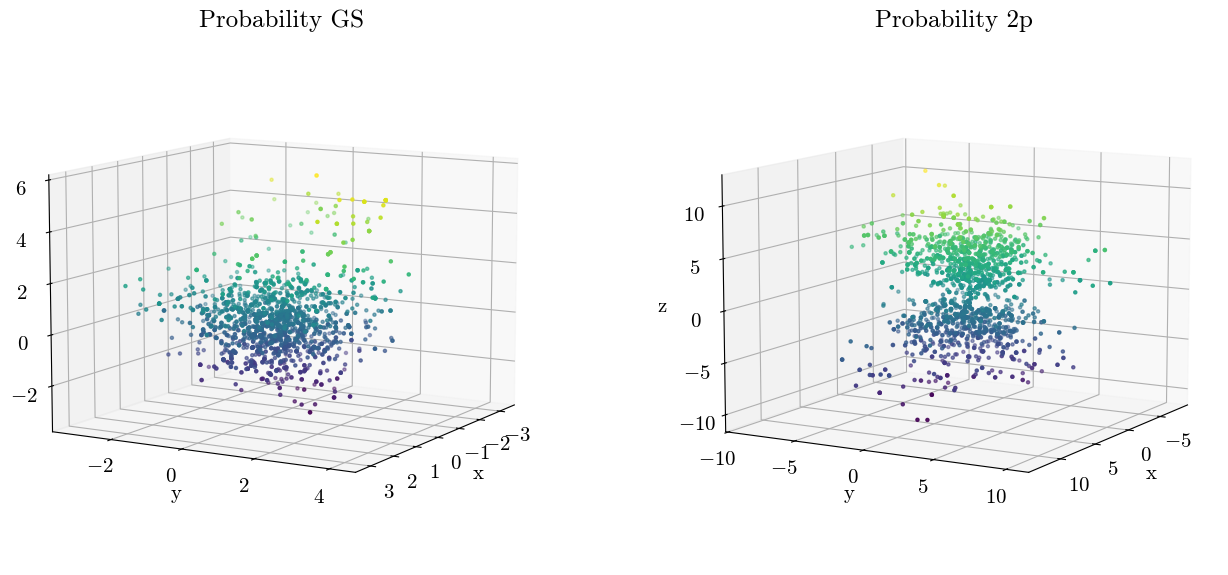

In [10]:
prob = np.loadtxt("OUTPUT/prob_GS.dat")
X=prob[:,0]
Y=prob[:,1]
Z=prob[:,2]

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
ax1.set_title('Probability GS')

prob = np.loadtxt("OUTPUT/prob_2p.dat")
X=prob[:,0]
Y=prob[:,1]
Z=prob[:,2]

ax2.scatter(X, Y, Z, c=Z, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)
ax2.set_title('Probability 2p')

plt.tight_layout()
plt.show()

Calcoliamo ora il valor medio del raggio della distribuzione e ci aspettiamo di ottenere:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
Per calcolare il valor medio eseguiamo l'algoritmo di Metropolis partendo da un punto $x = x_{equil}$, dove $x_{equil}$ è il valore di $x$ a cui si è arrivati dopo i passi di equilibrazione. Ad ogni passo valutiamo $ r $, cioè la distanza del punto dall'origine e usiamo il data blocking per valutare il valor medio. Otteniamo i grafici seguenti.

Parametri del sistema:
- $M = 10^5$ (passi)
- $N = 10^3$ (numero di blocchi)

Per il Ground State:

/tmp/ipykernel_97388/2315979043.py:16: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1,figsize=(15, 7))


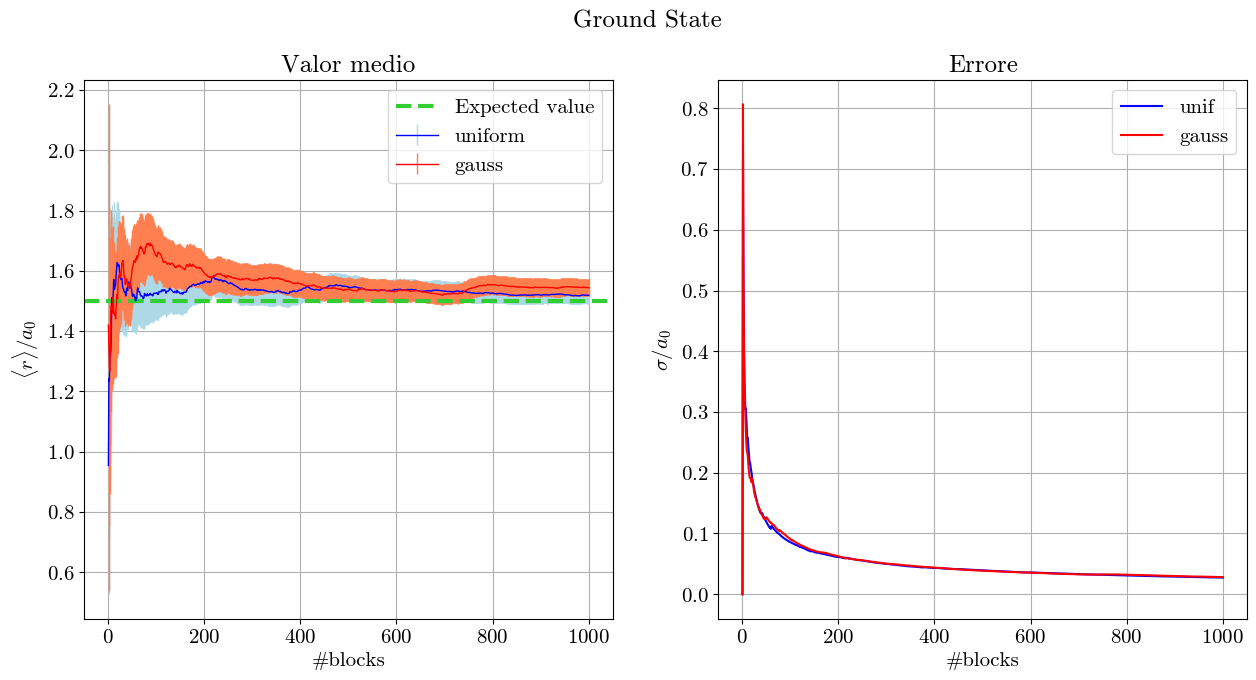

In [11]:
#ground state
    #uniforme
r_medio = np.loadtxt("OUTPUT/r_medio_GS_unif.dat")
x1 = r_medio[:,0]
y1 = r_medio[:,1]
err1 = r_medio[:,3]
plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1,y1,err1, ecolor= 'lightblue' ,color='blue', linewidth = 1, label = 'uniform')

    #gauss
r_medio_g = np.loadtxt("OUTPUT/r_medio_GS_gauss.dat")
x1_g = r_medio_g[:,0]
y1_g = r_medio_g[:,1]
err1_g = r_medio_g[:,3]
fig = plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1_g,y1_g,err1_g, ecolor= 'coral' ,color='red', linewidth = 1, label = 'gauss')

plt.axhline(y=1.5, color='limegreen', linestyle='--', linewidth = 3, label = 'Expected value')
fig.suptitle("Ground State")
plt.title("Valor medio")
plt.xlabel('#blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.legend()
plt.grid(True)

#errore
plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1, err1, color='blue', label = 'unif')
plt.plot(x1_g, err1_g, color='red', label = 'gauss')
plt.title('Errore')
plt.xlabel('#blocks')
plt.ylabel('$\sigma /a_0$')
plt.grid(True)
plt.legend()
plt.grid(True)

Per lo stato 2p:

/tmp/ipykernel_97388/840794929.py:16: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1,figsize=(15, 7))


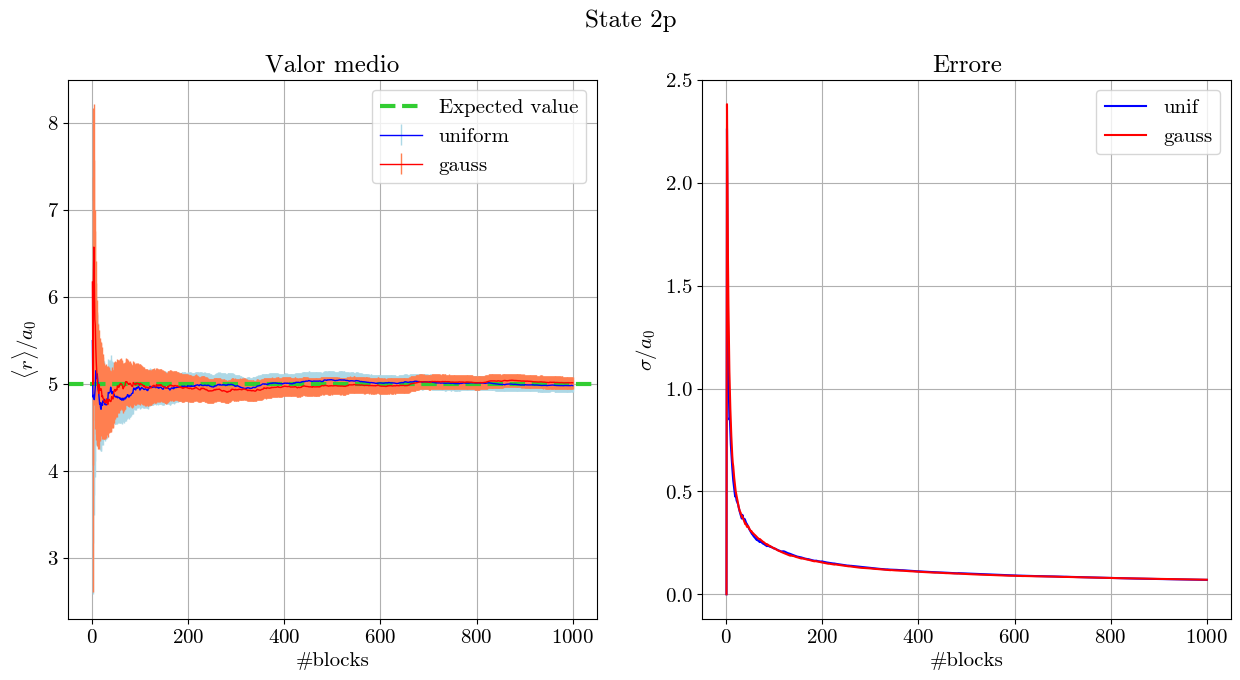

In [12]:
# 2p state
    #uniforme
r_medio = np.loadtxt("OUTPUT/r_medio_2p_unif.dat")
x1 = r_medio[:,0]
y1 = r_medio[:,1]
err1 = r_medio[:,3]
plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1,y1,err1, ecolor= 'lightblue' ,color='blue', linewidth = 1, label = 'uniform')

    #gauss
r_medio_g = np.loadtxt("OUTPUT/r_medio_2p_gauss.dat")
x1_g = r_medio_g[:,0]
y1_g = r_medio_g[:,1]
err1_g = r_medio_g[:,3]
fig = plt.figure(1,figsize=(15, 7))

plt.subplot(1,2,1)
plt.errorbar(x1_g,y1_g,err1_g, ecolor= 'coral' ,color='red', linewidth = 1, label = 'gauss')
plt.axhline(y=5, color='limegreen', linestyle='--', linewidth = 3, label = 'Expected value')
fig.suptitle("State 2p")
plt.title("Valor medio")
plt.xlabel('#blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.legend()
plt.grid(True)

#errore
plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1, err1, color='blue', label = 'unif')

plt.plot(x1_g, err1_g, color='red', label = 'gauss')
plt.title('Errore')
plt.xlabel('#blocks')
plt.ylabel('$\sigma /a_0$')
plt.grid(True)
plt.legend()
plt.grid(True)

Facendo partire il calcolo da un punto $x_0 = (100, 0, 0)$, senza fare l'equilibrazione ma fissando in partenza i valori di passo trovati precedentemente, si ottiene che il sistema parte da un valore di $\langle r \rangle$ più alto, come ci si aspetta e impiega piu passi a convergere, ma raggiunge comunque il valore atteso.

/tmp/ipykernel_97388/1964707278.py:16: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1,figsize=(15, 7))


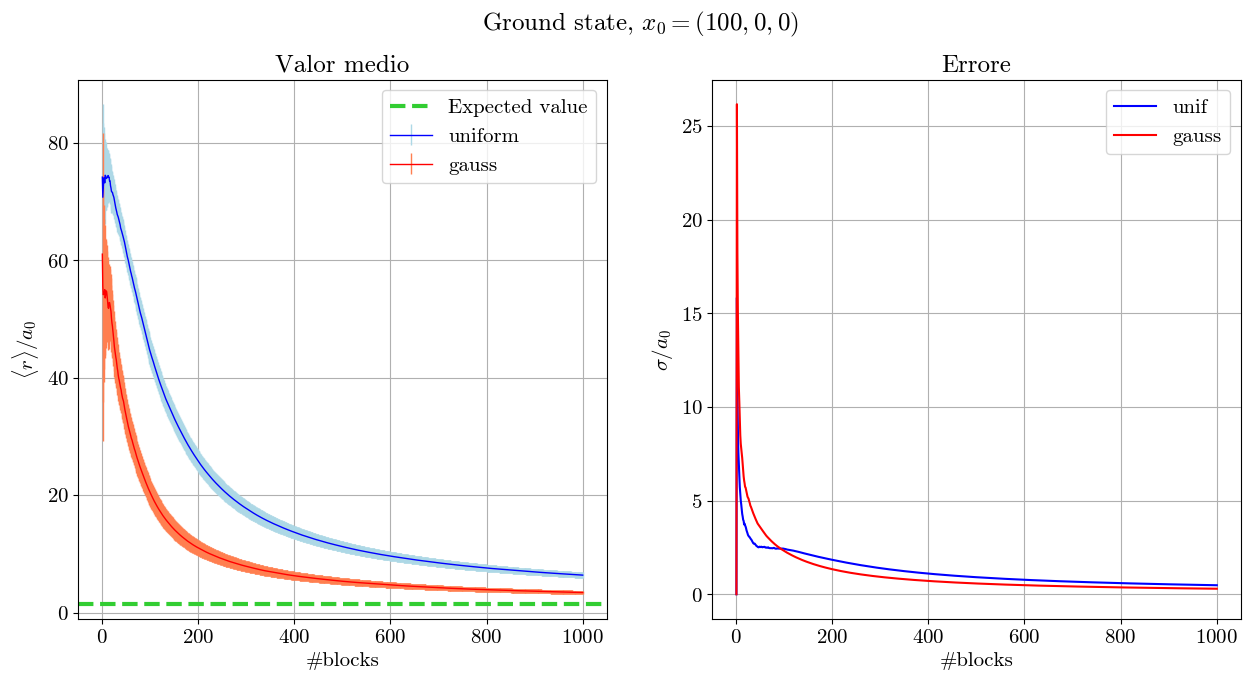

In [13]:
#ground state
    #uniforme
r_medio = np.loadtxt("OUTPUT/r_medio_GS_unif_100.dat")
x1 = r_medio[:,0]
y1 = r_medio[:,1]
err1 = r_medio[:,3]
plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1,y1,err1, ecolor= 'lightblue' ,color='blue', linewidth = 1, label = 'uniform')

    #gauss
r_medio_g = np.loadtxt("OUTPUT/r_medio_GS_gauss_100.dat")
x1_g = r_medio_g[:,0]
y1_g = r_medio_g[:,1]
err1_g = r_medio_g[:,3]
fig = plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1_g,y1_g,err1_g, ecolor= 'coral' ,color='red', linewidth = 1, label = 'gauss')

plt.axhline(y=1.5, color='limegreen', linestyle='--', linewidth = 3, label = 'Expected value')
fig.suptitle("Ground state, $x_0 = (100,0,0)$")
plt.title("Valor medio")
plt.xlabel('#blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.legend()
plt.grid(True)

#errore
plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1, err1, color='blue', label = 'unif')
plt.plot(x1_g, err1_g, color='red', label = 'gauss')
plt.title('Errore')
plt.xlabel('#blocks')
plt.ylabel('$\sigma /a_0$')
plt.grid(True)
plt.legend()
plt.grid(True)

/tmp/ipykernel_97388/267709278.py:16: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1,figsize=(15, 7))


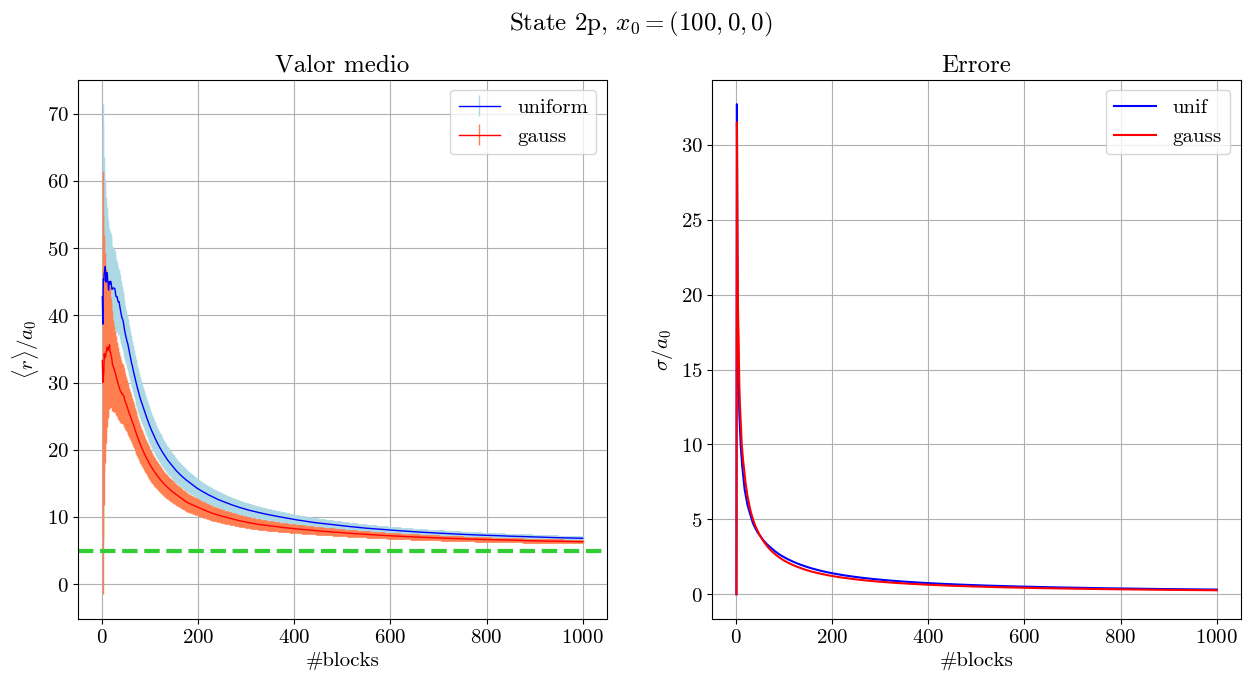

In [14]:
# 2p state
    #uniforme
r_medio = np.loadtxt("OUTPUT/r_medio_2p_unif_100.dat")
x1 = r_medio[:,0]
y1 = r_medio[:,1]
err1 = r_medio[:,3]
plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1,y1,err1, ecolor= 'lightblue' ,color='blue', linewidth = 1, label = 'uniform')

    #gauss
r_medio_g = np.loadtxt("OUTPUT/r_medio_2p_gauss_100.dat")
x1_g = r_medio_g[:,0]
y1_g = r_medio_g[:,1]
err1_g = r_medio_g[:,3]
fig = plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.errorbar(x1_g,y1_g,err1_g, ecolor= 'coral' ,color='red', linewidth = 1, label = 'gauss')
plt.axhline(y=5, color='limegreen', linestyle='--', linewidth = 3, )
fig.suptitle("State 2p, $x_0 = (100,0,0)$")
plt.title("Valor medio")
plt.xlabel('#blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.legend()
plt.grid(True)

#errore
plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x1, err1, color='blue', label = 'unif')

plt.plot(x1_g, err1_g, color='red', label = 'gauss')
plt.title('Errore')
plt.xlabel('#blocks')
plt.ylabel('$\sigma /a_0$')
plt.grid(True)
plt.legend()
plt.grid(True)